# Predicting Electricity Consumption (Kaggle Competition)

### Objective:

 - Develop accurate models of metered building electricity usage. The data comes from 100 buildings over a one-year timeframe.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Obtaining the data

In [30]:
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [31]:
treino.head()

,building_id,timestamp,meter_reading,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,1,2016-01-01 00:00:00,0.0,Education,2720,2004,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,2,2016-01-01 00:00:00,0.0,Education,5376,1991,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,3,2016-01-01 00:00:00,0.0,Education,23685,2002,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,4,2016-01-01 00:00:00,0.0,Education,116607,1975,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,5,2016-01-01 00:00:00,0.0,Education,8000,2000,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [32]:
teste.head()

,building_id,timestamp,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,id
0,0,2016-01-01 00:00:00,Education,7432,2008,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0 - 2016-01-01 00:00:00
1,6,2016-01-01 00:00:00,Lodging/residential,27926,1981,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,6 - 2016-01-01 00:00:00
2,7,2016-01-01 00:00:00,Education,121074,1989,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,7 - 2016-01-01 00:00:00
3,8,2016-01-01 00:00:00,Education,60809,2003,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,8 - 2016-01-01 00:00:00
4,14,2016-01-01 00:00:00,Education,86250,2013,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,14 - 2016-01-01 00:00:00


In [33]:
sample.head()

,id,meter_reading
0,0 - 2016-01-01 00:00:00,0
1,6 - 2016-01-01 00:00:00,0
2,7 - 2016-01-01 00:00:00,0
3,8 - 2016-01-01 00:00:00,0
4,14 - 2016-01-01 00:00:00,0


In [34]:
treino.shape

(698675, 13)

In [35]:
teste.shape

(174666, 13)

In [36]:
sample.shape

(174666, 2)

### Data exploratory analysis

In [53]:
treino['wind_speed'].value_counts() 

0.0     81480
2.1     78193
2.6     76909
3.1     73891
1.5     68770
3.6     67393
4.1     56225
4.6     45018
5.1     36744
5.7     27045
6.2     23246
6.7     18599
7.2     14580
7.7     10443
8.2      6748
8.8      4688
9.3      3770
9.8      1371
10.8      900
10.3      876
12.4      327
11.3      325
14.4      245
12.9      236
13.4      166
11.8      165
15.4      165
13.9      157
Name: wind_speed, dtype: int64

In [11]:
(treino.isnull().sum() / treino.shape[0]).sort_values(ascending=False)

cloud_coverage        0.435848
wind_direction        0.028514
sea_level_pressure    0.009621
dew_temperature       0.000319
air_temperature       0.000319
precip_depth_1_hr     0.000120
wind_speed            0.000000
year_built            0.000000
square_feet           0.000000
primary_use           0.000000
meter_reading         0.000000
timestamp             0.000000
building_id           0.000000
dtype: float64

In [12]:
(teste.isnull().sum() / teste.shape[0]).sort_values(ascending=False)

cloud_coverage        0.436135
wind_direction        0.028139
sea_level_pressure    0.009790
dew_temperature       0.000424
air_temperature       0.000424
precip_depth_1_hr     0.000086
id                    0.000000
wind_speed            0.000000
year_built            0.000000
square_feet           0.000000
primary_use           0.000000
timestamp             0.000000
building_id           0.000000
dtype: float64

In [13]:
treino.describe()

,building_id,meter_reading,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,698675.000000,698675.000000,698675.000000,698675.000000,698452.000000,394159.000000,698452.000000,698591.000000,691953.000000,678753.000000,698675.000000
mean,50.061555,231.255069,88803.210646,1995.637087,22.841813,3.043406,16.824991,1.370126,1017.985766,156.437364,3.376827
std,29.345241,382.396065,109440.853130,14.383392,6.030032,2.119795,6.512371,12.870762,4.035453,118.367931,2.156156
min,0.000000,0.000000,283.000000,1968.000000,1.700000,0.000000,-9.400000,-1.000000,992.000000,0.000000,0.000000
25%,24.000000,0.000000,24456.000000,1985.000000,18.900000,2.000000,13.300000,0.000000,1015.500000,60.000000,2.100000
50%,50.000000,71.259300,53130.000000,2001.000000,23.900000,2.000000,18.300000,0.000000,1018.000000,140.000000,3.100000
75%,76.000000,302.715000,103286.000000,2007.000000,26.700000,4.000000,22.200000,0.000000,1020.600000,260.000000,4.600000
max,100.000000,4521.000000,487433.000000,2016.000000,36.100000,9.000000,25.600000,343.000000,1030.200000,360.000000,15.400000


In [14]:
treino.describe(include=['O'])

,timestamp,primary_use
count,698675,698675
unique,8784,7
top,2016-11-26 19:00:00,Education
freq,92,199874


### Some data visualizations 

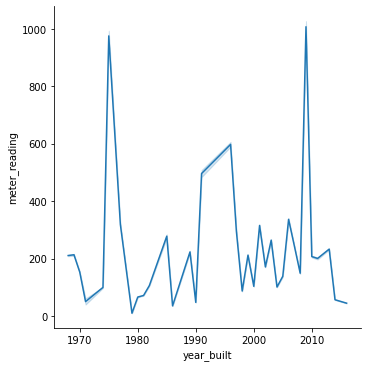

In [14]:
sns.relplot(x='year_built', y='meter_reading', kind="line", data=treino)

<AxesSubplot:xlabel='primary_use', ylabel='meter_reading'>

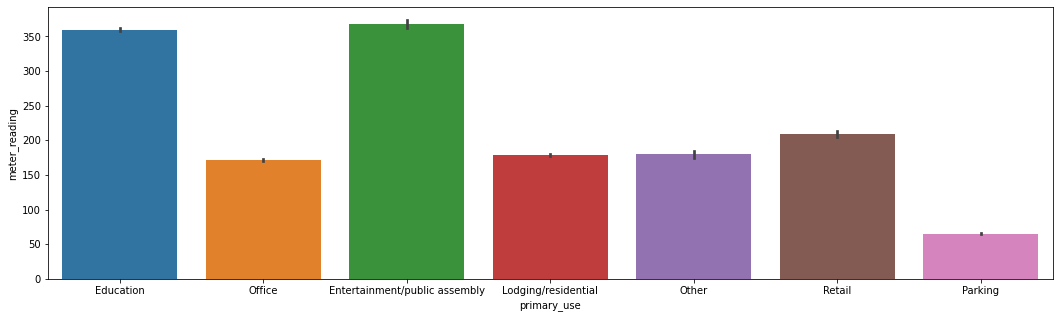

In [66]:
f, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='primary_use', y='meter_reading', data=treino)

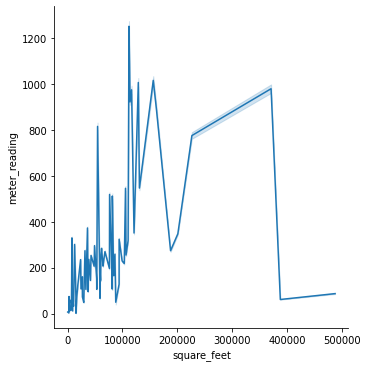

In [15]:
sns.relplot(x='square_feet', y='meter_reading', data=treino, kind="line")

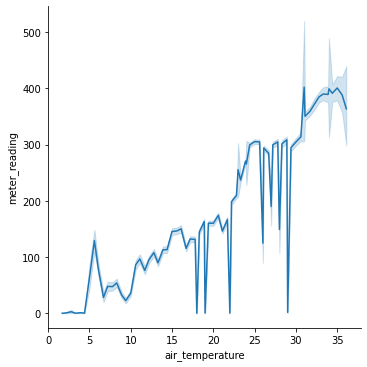

In [16]:
sns.relplot(x='air_temperature', y='meter_reading', data=treino, kind="line")

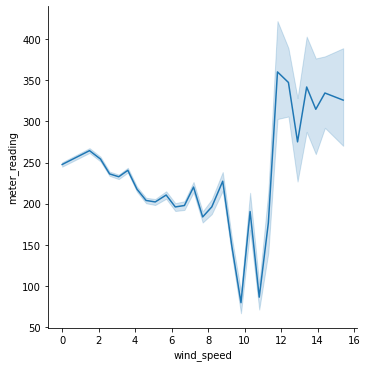

In [54]:
sns.relplot(x='wind_speed', y='meter_reading', data=treino, kind="line")

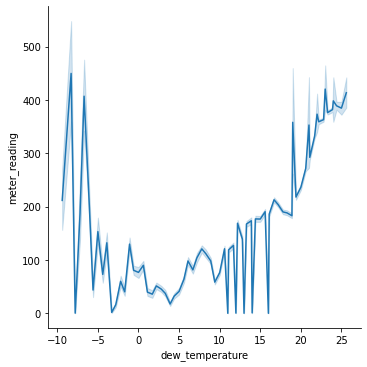

In [58]:
sns.relplot(x='dew_temperature', y='meter_reading', data=treino, kind="line")

### Merge of train and test data for better data manipulation

In [59]:
train_idx = treino.shape[0]
test_idx = teste.shape[0]

In [60]:
id = teste['id']

In [61]:
target = treino.meter_reading.copy()
treino.drop(['meter_reading'], axis=1, inplace=True)

In [62]:
df_merged = pd.concat(objs=[treino, teste], axis=0).reset_index(drop=True)

print(f"df_merged.shape: ({df_merged.shape[0]} x {df_merged.shape[1]})")

df_merged.shape: (873341 x 13)


In [63]:
df_merged.head()

,building_id,timestamp,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,id
0,1,2016-01-01 00:00:00,Education,2720,2004,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,NaN
1,2,2016-01-01 00:00:00,Education,5376,1991,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,NaN
2,3,2016-01-01 00:00:00,Education,23685,2002,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,NaN
3,4,2016-01-01 00:00:00,Education,116607,1975,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,NaN
4,5,2016-01-01 00:00:00,Education,8000,2000,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,NaN


### Feature Engineering

In [64]:
# excluding columns that won't be used as features
df_merged.drop(['cloud_coverage', 'precip_depth_1_hr',
                'sea_level_pressure', 'wind_direction', 'wind_speed'], axis=1, inplace=True)

In [65]:
df_merged.drop(['id'], axis=1, inplace=True)

In [66]:
df_merged.drop(['timestamp'], axis=1, inplace=True)

In [67]:
df_merged.isnull().sum()

building_id          0
primary_use          0
square_feet          0
year_built           0
air_temperature    297
dew_temperature    297
dtype: int64

In [123]:
# Replacing missing values

In [68]:
dew_median = df_merged['dew_temperature'].median()
df_merged['dew_temperature'].fillna(dew_median, inplace=True)

In [69]:
air_median = df_merged['air_temperature'].median()
df_merged['air_temperature'].fillna(air_median, inplace=True)

In [ ]:
# converting the column 'primary_use' as dummie variables
primary_use_dummies = pd.get_dummies(df_merged['primary_use'], prefix='primary_use')
df_merged = pd.concat([df_merged, primary_use_dummies], axis=1)
df_merged.drop('primary_use', axis=1, inplace=True)

In [71]:
df_merged.head()

,building_id,square_feet,year_built,air_temperature,dew_temperature,primary_use_Education,primary_use_Entertainment/public assembly,primary_use_Lodging/residential,primary_use_Office,primary_use_Other,primary_use_Parking,primary_use_Retail
0,1,2720,2004,25.0,20.0,1,0,0,0,0,0,0
1,2,5376,1991,25.0,20.0,1,0,0,0,0,0,0
2,3,23685,2002,25.0,20.0,1,0,0,0,0,0,0
3,4,116607,1975,25.0,20.0,1,0,0,0,0,0,0
4,5,8000,2000,25.0,20.0,1,0,0,0,0,0,0


In [72]:
# Recovering the train and test data

treino = df_merged.iloc[:train_idx]
teste = df_merged.iloc[train_idx:]

In [73]:
treino.shape

(698675, 12)

In [74]:
teste.shape

(174666, 12)

In [75]:
target.shape

(698675,)

### Making predictions with Machine Learning models

In [109]:
# Prediction with LinearRegression model

In [76]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [77]:
reg.fit(treino, target)

LinearRegression()

In [78]:
reg.score(treino, target)

0.3142601329844127

In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
lr = reg.predict(teste)

In [81]:
lr

array([253.23112849, 107.46005599, 560.9637777 , ..., 444.47222218,
        44.28224935, 479.59203401])

In [82]:
lr.shape

(174666,)

In [83]:
mean_squared_error(target[:174666], lr, squared=False)

315.7852664328117

In [108]:
# Prediction with DecisionTreeRegressor model

In [84]:
from sklearn import tree

In [85]:
clf = tree.DecisionTreeRegressor()

In [86]:
clf.fit(treino, target)

DecisionTreeRegressor()

In [87]:
clf.score(treino,target)

0.7279150084003907

In [88]:
dtr = clf.predict(teste)

In [101]:
dtr

array([168.251   ,  63.64195 , 295.719125, ...,   0.      , 111.94    ,
       414.143   ])

In [103]:
dtr.shape

(174666,)

In [89]:
mean_squared_error(target[:174666], dtr, squared=False)

403.6798303463161

In [111]:
# Prediction with GradientBoostingRegressor model

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

In [92]:
gbr = GradientBoostingRegressor()

In [93]:
gbr =  GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,
...     max_depth=1, random_state=0, loss='ls').fit(treino, target)

In [94]:
gbr.score(treino, target)

0.4594426678047886

In [95]:
pred_gbr = gbr.predict(teste)

In [96]:
mean_squared_error(target[:174666], pred_gbr, squared=False)

328.48357223296324

### Creating csv file for submission on Kaggle

In [112]:
# Submitting the predictions with DecisionTreeRegressor model, because had the best score

In [98]:
submission_dtr= pd.DataFrame({
    "id": id,
    "meter_reading": dtr
})

In [99]:
submission_dtr.head()

,id,meter_reading
0,0 - 2016-01-01 00:00:00,168.251000
1,6 - 2016-01-01 00:00:00,63.641950
2,7 - 2016-01-01 00:00:00,295.719125
3,8 - 2016-01-01 00:00:00,250.423667
4,14 - 2016-01-01 00:00:00,207.270778


In [102]:
#submission_dtr.to_csv('./submission__dtr.csv', index=False)

### Leaderbord on Kaggle

- This competition had alread closed when the author of this notebook made the submission.

In [120]:
# Public leaderboard on Kaggle competition

In [116]:
pd.read_csv('predicting-electricity-consumption-publicleaderboard.csv')

,TeamId,TeamName,SubmissionDate,Score
0,6108899,Benjamin Tiggemann,2021-01-29 12:35:05,31.67917
1,6180969,Jose M. S. Candales,2021-01-29 10:10:22,36.28383
2,6118497,Amir Mikdad,2021-01-19 23:35:52,42.80060
3,6120926,Konrad Sarodnick,2021-01-24 10:19:07,53.08712
4,6113442,Jonas B,2021-01-30 23:34:00,68.61986
5,6110640,UgurOzcan,2021-01-06 11:10:45,115.82700
6,6108809,Andrej Schick,2021-01-14 09:45:13,167.73467
7,6144178,Meesala sai dhanush,2021-01-12 15:36:54,168.77428
8,6120973,Henning Siemes,2021-01-07 12:04:12,272.44448
9,6119160,HHalimeh,2021-01-21 14:35:25,275.81865


In [121]:
# Author public score

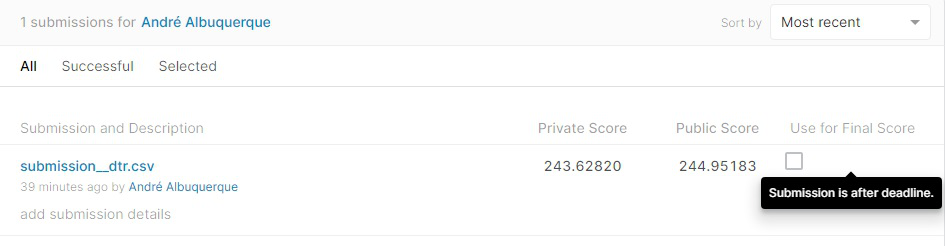

In [115]:
from IPython.display import display
from PIL import Image


path="Score_Electricity.jpg"
display(Image.open(path))